In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data= pd.read_csv('../input/train.csv')
data2 = pd.read_csv('../input/test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data2.shape

(418, 11)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**We can delete 'Cabin' as there too many null values**

In [10]:
del data['Cabin']
del data2['Cabin']

**Columns- PassengerId, Name, Ticket, are of no use in the prediction, as they are just values indicating nothing**

In [11]:
del data['PassengerId']
del data2['PassengerId']

In [12]:
del data['Name']
del data2['Name']

In [13]:
del data['Ticket']
del data2['Ticket']

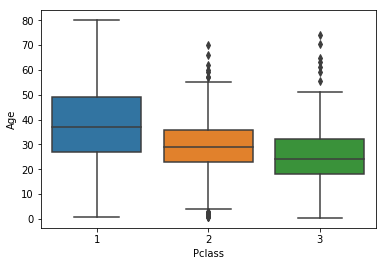

In [14]:
sns.boxplot('Pclass','Age',data=data)

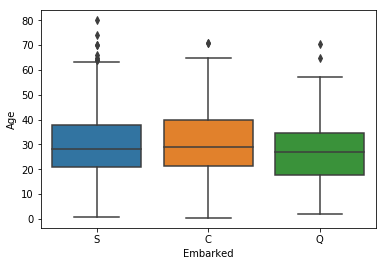

In [15]:
sns.boxplot('Embarked','Age',data=data)

**We can replace 'Age' null values, with 'Pclass' each category median values as indicated by the Boxplot**<br>
'Embarked' is not the right variable for 'Age' null values, as all median are nearly same.

In [16]:
data['Age'].fillna(0,inplace=True)
data2['Age'].fillna(0,inplace=True)

In [17]:
for i in range(891):
    if data['Pclass'][i]==1 and data['Age'][i]==0:
        data['Age'][i]=data['Pclass'].median()
    elif data['Pclass'][i]==2 and data['Age'][i]==0:
        data['Age'][i]=data['Pclass'].median()
    elif data['Pclass'][i]==3 and data['Age'][i]==0:
        data['Age'][i]=data['Pclass'].median()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
for i in range(418):
    if data2['Pclass'][i]==1 and data2['Age'][i]==0:
        data2['Age'][i]=data2['Pclass'].median()
    elif data2['Pclass'][i]==2 and data2['Age'][i]==0:
        data2['Age'][i]=data2['Pclass'].median()
    elif data2['Pclass'][i]==3 and data2['Age'][i]==0:
        data2['Age'][i]=data2['Pclass'].median()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
data2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

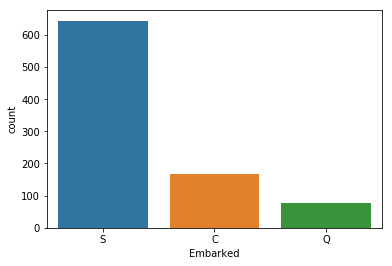

In [21]:
sns.countplot(data['Embarked'])

**'Embarked' column has much more 'S' category, thus we can replace Null values by S**

In [22]:
data['Embarked'].fillna('S',inplace=True)

In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

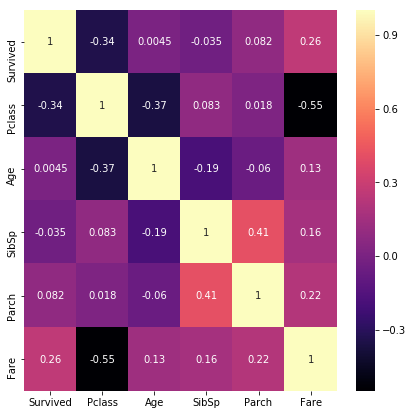

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap='magma')

**SibSp**

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


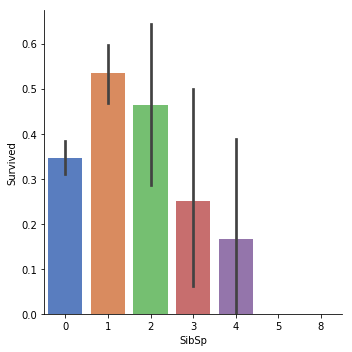

In [25]:
sns.factorplot('SibSp','Survived',data=data,kind='bar',palette='muted')

Person having 0 or 1 sibling/spouse have more chances to survive.

**Pclass**

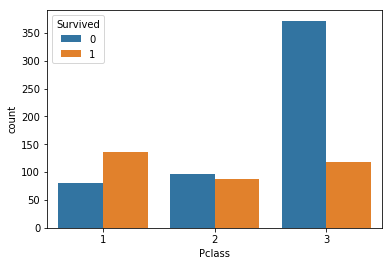

In [26]:
sns.countplot('Pclass',data=data,hue='Survived')

Clearly, we can see that higher the class of passenger, more the probabilty that he/she will be saved

Since, Higher the class, more will be the Fair. Thus, we can remove the 'Fare' column from the dataset

In [27]:
del data['Fare']
del data2['Fare']

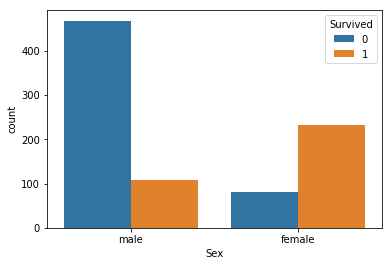

In [28]:
sns.countplot('Sex',hue='Survived',data=data)

**Male is less Survived as compared to Females...**

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


Now, lets Encode the 'Sex' and 'Embarked' column

In [30]:
data2.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [31]:
X= data.iloc[:,1:].values
y= data.iloc[:,0].values
X_test= data2.iloc[:,:].values

In [32]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_X_1= LabelEncoder()
X[:,1]=le_X_1.fit_transform(X[:,1])
# data2
le_Xtest_1= LabelEncoder()
X_test[:,1]=le_Xtest_1.fit_transform(X_test[:,1])

In [33]:
le_X_2= LabelEncoder()
X[:,5]=le_X_2.fit_transform(X[:,5])
ohe= OneHotEncoder(categorical_features=[5])
X= ohe.fit_transform(X).toarray()
X= X[:,1:]
# data2
le_Xtest_2= LabelEncoder()
X_test[:,5]=le_Xtest_2.fit_transform(X_test[:,5])
ohe= OneHotEncoder(categorical_features=[5])
X_test= ohe.fit_transform(X_test).toarray()
X_test= X_test[:,1:]

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data w

In [34]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [35]:
kfold = StratifiedKFold(n_splits=10)

**RandomForest**

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
rfc = RandomForestClassifier()
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [3,4,5,6],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(rfc,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X,y)

RFC_best=gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   41.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.1min finished


0.8226711560044894

In [37]:
'''rfc=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X,y)
y_pred=rfc.predict(X_test)'''

"rfc=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',\n                       max_depth=5, max_features='auto', max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=10, min_samples_split=3,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=None,\n                       verbose=0, warm_start=False)\nrfc.fit(X,y)\ny_pred=rfc.predict(X_test)"

**XGBOOST**

In [38]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
params = {
     'learning_rate': [0.05],
     'n_estimators': [1000,1100],
     'max_depth':[7,8],
     'reg_alpha':[0.3,0.4,0.5]
    }
 
# Initializing the XGBoost Regressor
xgb_model = XGBClassifier()
 
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,
                    verbose=True,
                    cv=5,
                    n_jobs=-1)
gsearch.fit(X,y) 
#Printing the best chosen params
XGB_best=gsearch.best_params_'''

"from xgboost import XGBClassifier\nfrom sklearn.model_selection import cross_val_score,GridSearchCV\nparams = {\n     'learning_rate': [0.05],\n     'n_estimators': [1000,1100],\n     'max_depth':[7,8],\n     'reg_alpha':[0.3,0.4,0.5]\n    }\n \n# Initializing the XGBoost Regressor\nxgb_model = XGBClassifier()\n \n# Gridsearch initializaation\ngsearch = GridSearchCV(xgb_model, params,\n                    verbose=True,\n                    cv=5,\n                    n_jobs=-1)\ngsearch.fit(X,y) \n#Printing the best chosen params\nXGB_best=gsearch.best_params_"

In [39]:
'''xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.4, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
print(XGBClassifier())
 
# Cross validation scores
f1_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))
 
# Training the models
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)'''

'xgb_model = XGBClassifier(base_score=0.5, booster=\'gbtree\', colsample_bylevel=1,\n       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,\n       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,\n       n_jobs=1, nthread=None, objective=\'binary:logistic\', random_state=0,\n       reg_alpha=0.4, reg_lambda=1, scale_pos_weight=1, seed=None,\n       silent=True, subsample=1)\nprint(XGBClassifier())\n \n# Cross validation scores\nf1_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring=\'f1\')\nprint("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))\n \n# Training the models\nxgb_model.fit(X_train,y_train)\ny_pred=xgb_model.predict(X_test)'

**Adaboost**

In [40]:
# Adaboost

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X,y)

ada_best=gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    2.3s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
'''from sklearn.tree import DecisionTreeClassifier
adc=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.5, n_estimators=2, random_state=7)
adc.fit(X,y)
y_pred=adc.predict(X_test)'''

"from sklearn.tree import DecisionTreeClassifier\nadc=AdaBoostClassifier(algorithm='SAMME.R',\n                   base_estimator=DecisionTreeClassifier(class_weight=None,\n                                                         criterion='entropy',\n                                                         max_depth=None,\n                                                         max_features=None,\n                                                         max_leaf_nodes=None,\n                                                         min_impurity_decrease=0.0,\n                                                         min_impurity_split=None,\n                                                         min_samples_leaf=1,\n                                                         min_samples_split=2,\n                                                         min_weight_fraction_leaf=0.0,\n                                                         presort=False,\n                                 

**Gradient Boosting Classifier**

In [42]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X,y)

GBC_best=gsGBC.best_estimator_

# Best score
gsGBC.best_score_


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   28.8s finished


0.819304152637486

**SVC**

In [43]:
from sklearn.svm import SVC
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X,y)

SVMC_best=gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   37.6s finished


0.8204264870931538

In [44]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X, y)
y_pred = votingC.predict(X_test)

In [45]:
data3=pd.read_csv('../input/test.csv')

In [46]:
submission = pd.DataFrame({'PassengerId': data3.PassengerId, 'Survived': y_pred})
# you could use any filename. We choose submission here
submission.to_csv('FirstCompetition_self.csv', index=False)